# SIT307 - Group 8

Source of dataset:
https://www.kaggle.com/datasets/dileep070/heart-disease-prediction-using-logistic-regression

### Content

##### 1. **Information**
- Tables of Contents
- Attributes in Dataset
- Packages Used
- Dataset Information
- Duplicate Values
- NaN Values
- Outliers
- Data Distribution for Raw Dataset

##### 2. **Data Preprocessing**
- Data cleaning: Handling NaN value
- Data cleaning: Handling Outliers

##### 3. **Machine Learning**
- Dataset Splitting
1. Logistic Regression Model
2. Decision Tree Classifier
3. kNN Algorithm
4. Random Forest Classifier
5. Support Vector Machine (SVC)
6. Extreme Gradient Boost Classifier
7. Naive Bayes
- Model Summary

##### 4. Models' Accuracy Improvement
1. Feature Selection
    - Feature Selection
    - Re-train Model after Feature Selection
2. Feature Scaling
3. Stacked Classifier
4. Cross Validation

---------------------------
---------------------------
---------------------------

### Attributes in Dataset

Demographic:
- Sex: male or female(Nominal)
- Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)
Behavioral
- Current Smoker: whether or not the patient is a current smoker (Nominal)
- Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.)
Medical( history)
- BP Meds: whether or not the patient was on blood pressure medication (Nominal)
- Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)
- Prevalent Hyp: whether or not the patient was hypertensive (Nominal)
- Diabetes: whether or not the patient had diabetes (Nominal)
Medical(current)
- Tot Chol: total cholesterol level (Continuous)
- Sys BP: systolic blood pressure (Continuous)
- Dia BP: diastolic blood pressure (Continuous)
- BMI: Body Mass Index (Continuous)
- Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.)
- Glucose: glucose level (Continuous)
Predict variable (desired target)
- 10 year risk of coronary heart disease CHD (binary: “1”, means “Yes”, “0” means “No”)


### Packages Used

In [ ]:
#import and install all packages
!pip install statsmodels==0.13.2
!pip install xgboost==1.6.1
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn
import scipy.stats as stz
import statsmodels.api as sm
import warnings
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from numpy import nan as NA
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
import seaborn as sns

You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [ ]:
warnings.filterwarnings('ignore') # irgnore unnecessary warning

In [ ]:
# Reading and displaying the dataset through pandas.
df = pd.read_csv('framingham.csv')
df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0


### Dataset Information

In [ ]:
#dataset shape and infomation of dataset
print('Number of Columns :', df.shape[1], '\nNumber of Rows : ', df.shape[0])
print('Dataset info:')
df.info

Number of Columns : 16 
Number of Rows :  4238
Dataset info:


<bound method DataFrame.info of       male  age  education  currentSmoker  cigsPerDay  BPMeds  \
0        1   39        4.0              0         0.0     0.0   
1        0   46        2.0              0         0.0     0.0   
2        1   48        1.0              1        20.0     0.0   
3        0   61        3.0              1        30.0     0.0   
4        0   46        3.0              1        23.0     0.0   
...    ...  ...        ...            ...         ...     ...   
4233     1   50        1.0              1         1.0     0.0   
4234     1   51        3.0              1        43.0     0.0   
4235     0   48        2.0              1        20.0     NaN   
4236     0   44        1.0              1        15.0     0.0   
4237     0   52        2.0              0         0.0     0.0   

      prevalentStroke  prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  \
0                   0             0         0    195.0  106.0   70.0  26.97   
1                   0        

### Data Distribution for Raw Dataset

array([[<AxesSubplot:title={'center':'male'}>,
        <AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'education'}>,
        <AxesSubplot:title={'center':'currentSmoker'}>],
       [<AxesSubplot:title={'center':'cigsPerDay'}>,
        <AxesSubplot:title={'center':'BPMeds'}>,
        <AxesSubplot:title={'center':'prevalentStroke'}>,
        <AxesSubplot:title={'center':'prevalentHyp'}>],
       [<AxesSubplot:title={'center':'diabetes'}>,
        <AxesSubplot:title={'center':'totChol'}>,
        <AxesSubplot:title={'center':'sysBP'}>,
        <AxesSubplot:title={'center':'diaBP'}>],
       [<AxesSubplot:title={'center':'BMI'}>,
        <AxesSubplot:title={'center':'heartRate'}>,
        <AxesSubplot:title={'center':'glucose'}>,
        <AxesSubplot:title={'center':'TenYearCHD'}>]], dtype=object)

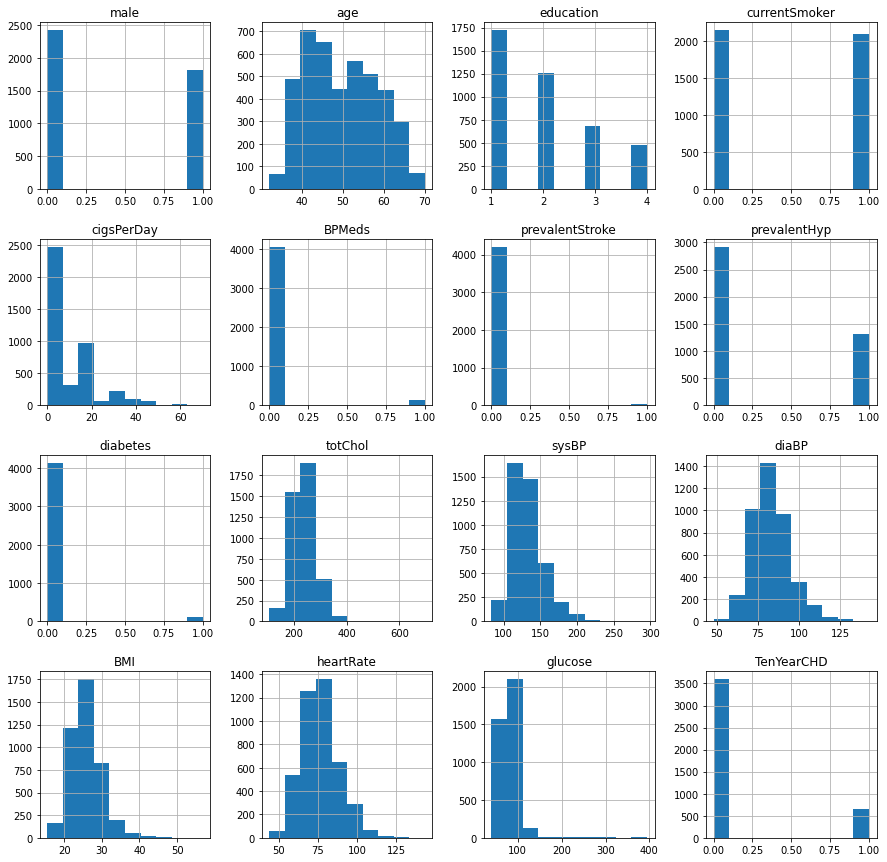

In [ ]:
#dataset distribution
df.hist(figsize=(15,15))

***Observation:***

Most of the categorical features have imbalanced spread of data, where one value dominates the other. The highly imbalanced categorical features as seen from the graphs are BPMeds, prevalentStroke, and diabetes
Whereas, most of the numerical features are skewed and are unevenly distributed. The most skewed features are glucose, cigsPerDay, and heartRate

### Duplicate Values in Dataset

In [ ]:
# Code shows the sum of duplicated values.
print('There are '+str(df.duplicated().sum())+' duplicate value') 

There are 0 duplicate value


### NaN Values in Dataset

In [ ]:
print('NaN value: \n'+str(df.isnull().sum())) # Code shows the sum of NaN values in each column.

NaN value: 
male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64


***Observation:***

There are 0 duplicate value in the dataset, but multiple NaN values throughout most columns.

### Outliers

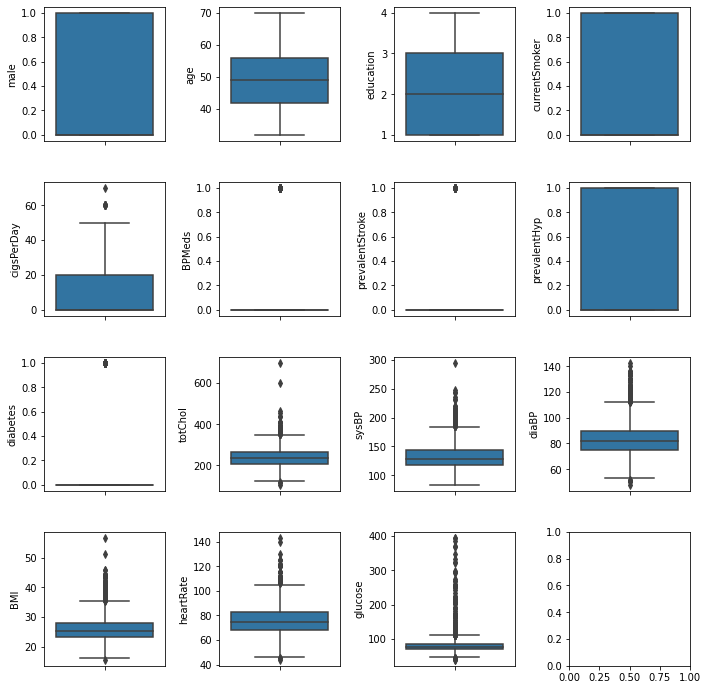

In [ ]:
# Detecting and Filtering Outliers
# Notebook needs to be rerun as outliers are handled after data cleansing
# df = dataset before cleansing, data = dataset after cleansing

fig, ax = plt.subplots(figsize=(10,10), nrows=4, ncols=4)
ax = ax.flatten()
plt.tight_layout(pad=2)
i = 0
for k,v in df.items():
    sns.boxplot(y=v, ax=ax[i])
    i+=1
    if i==15:
        break

***Observation:***

All of the numerical attributes have severe amount of outliers

## Data Preprocessing

Rows with more than 10% missing values should be removed. As only 1.4% of our data entires have more than this amount of missing values, this amount of rows are safe to be removed. 

In [ ]:
data = df #Rename dataset to data

In [ ]:
#Checking for the amount of missing values
print("Amount of rows with more than 10% missing values: " + str(len(df[df.isnull().mean(axis=1) > 0.1])))
print(str(round(len(df[df.isnull().mean(axis=1) > 0.1])/len(df)*100,2))+ "% of rows in the dataset have more than 10% missing values")

Amount of rows with more than 10% missing values: 61
1.44% of rows in the dataset have more than 10% missing values


In [ ]:
#Removing rows that have more than 10% missing value which mean more than 2 attributes 
data = data[data.isnull().mean(axis=1) < 0.1]
print('Remaining NaN values: \n'+str(data.isnull().sum()))

Remaining NaN values: 
male                 0
age                  0
education           93
currentSmoker        0
cigsPerDay          23
BPMeds              51
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol              9
sysBP                0
diaBP                0
BMI                 13
heartRate            1
glucose            331
TenYearCHD           0
dtype: int64


As most of the data is skewed, the mode imputation method should be in place to fill in the missing data.

In [ ]:
# The code below will replace all NaN value with mode value.

for column in data.columns:
    data[column].fillna(data[column].mode()[0], inplace=True)

# Check again to see any missing value remain.

data.isnull().sum()
print('NaN value: \n'+str(data.isnull().sum()))

NaN value: 
male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64


### Handling Outliers

In [ ]:
# function for applying IQR rule to a specific column

def IQRrule(column):
    global data
    q1 = data[column].quantile(0.25)
    q3 = data[column].quantile(0.75)
    iqr = q3 - q1
    lowestWhisker = q1-1.5*iqr
    upperWhisker = q3+1.5*iqr
    data = data[(data[column]<upperWhisker) & (data[column]>lowestWhisker)]

In [ ]:
# Column for applying IQR rule 
columns = ["sysBP", "diaBP", "age", "totChol", "heartRate"]

for column in columns:
    IQRrule(column)

Text(0, 0.5, 'no. of patients')

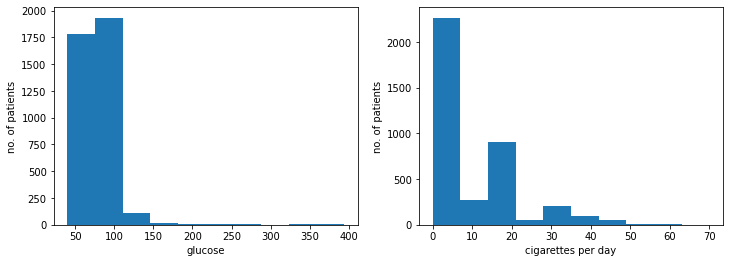

In [ ]:
# Histogram
plt.figure(figsize=(12,4))

plt.subplot(1, 2, 1)
plt.hist(data['glucose'])
plt.xlabel('glucose')
plt.ylabel('no. of patients')

plt.subplot(1, 2, 2)
plt.hist(data['cigsPerDay'])
plt.xlabel('cigarettes per day')
plt.ylabel('no. of patients')

hence, values of glucose and cigsPerDay are kept as it is

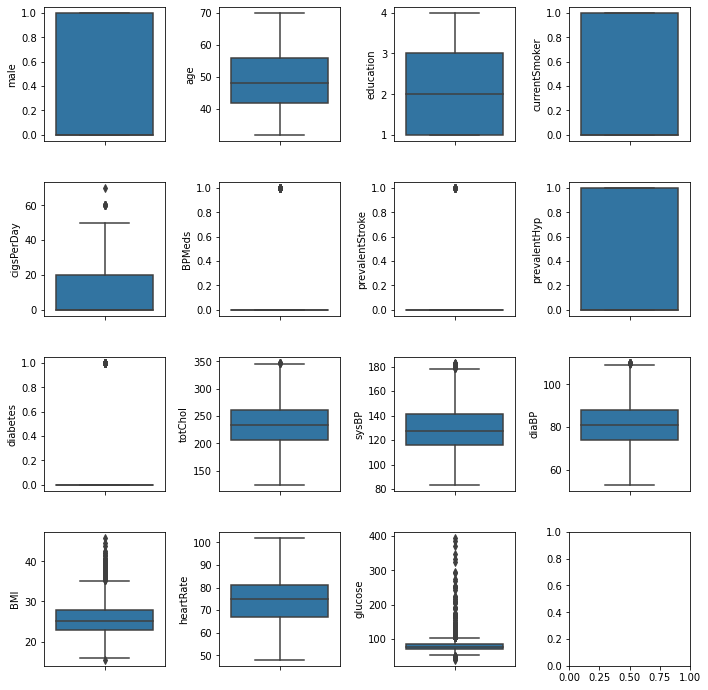

In [ ]:
#check again for Outliers

fig, ax = plt.subplots(figsize=(10,10), nrows=4, ncols=4)
ax = ax.flatten()
plt.tight_layout(pad=2)
i = 0
for k,v in data.items():
    sns.boxplot(y=v, ax=ax[i])
    i+=1
    if i==15:
        break

In [ ]:
# New column bloodPressure
sysBP=data['sysBP']
diaBP=data['diaBP']
pulsePressure=sysBP-diaBP
data['sysBP']=pulsePressure
data = data.drop(['diaBP'], axis=1)
data.rename(columns = {'sysBP':'bloodPressure'}, inplace = True)

In [ ]:
data

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,bloodPressure,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,36.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,40.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,47.5,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,55.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,46.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,87.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,46.5,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,0.0,0,0,0,248.0,59.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,39.5,19.16,86.0,75.0,0


# Machine Learning

## Dataset Splitting

In [ ]:
#Splitting the dataset, train and test
train_data = data.iloc[:,:-1]
test_data = data['TenYearCHD']
X_train, X_test, y_train, y_test = train_test_split(train_data, test_data,test_size=0.2, random_state = 0)

In [ ]:
data

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,bloodPressure,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,36.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,40.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,47.5,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,55.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,46.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,87.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,46.5,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,0.0,0,0,0,248.0,59.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,39.5,19.16,86.0,75.0,0


### 1. Logistic Regression Model

In [ ]:
#import Logistic Regression 
lr = LogisticRegression()
lr.fit(X_train, y_train) # fitting dataset to our model
lr_pred = lr.predict(X_test) #pridict 
score = lr.score(X_test,y_test)

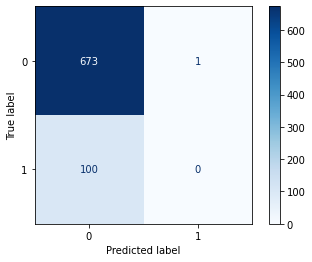

In [ ]:
# Plot Confusion Matrix for Binary Classes an array that depicts the True Positives, False Positives, False Negatives, and True negatives

plot_confusion_matrix(lr, X_test, y_test, cmap = "Blues")  
plt.grid(False)
plt.show()

In [ ]:
#Accuracy score for this model
lr_precision = precision_score(lr_pred, y_test)*100
print("Precision for Logistic Regression Model: " + str(lr_precision) + "%")
lr_accuracy = accuracy_score(lr_pred, y_test)*100
print("Accuracy for Logistic Regression Model: " + str(lr_accuracy) + "%")

Precision for Logistic Regression Model: 0.0%
Accuracy for Logistic Regression Model: 86.95090439276485%


### 2. Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(min_samples_split=40, random_state=0) 
dtc.fit(X_train, y_train)
dtc_pred = dtc.predict(X_test)
#setting min_samples_split as 40, we got good results for all metrics

In [ ]:
# Exporting the tree in text format
from sklearn.tree import export_text
dt_text_format = export_text(dtc, feature_names=list(train_data.columns))
print('Decision tree in text format : \n%s'%dt_text_format)

Decision tree in text format : 
|--- age <= 48.50
|   |--- cigsPerDay <= 9.50
|   |   |--- glucose <= 233.50
|   |   |   |--- bloodPressure <= 96.00
|   |   |   |   |--- male <= 0.50
|   |   |   |   |   |--- glucose <= 119.50
|   |   |   |   |   |   |--- BMI <= 39.03
|   |   |   |   |   |   |   |--- age <= 39.50
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- age >  39.50
|   |   |   |   |   |   |   |   |--- bloodPressure <= 24.50
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |--- bloodPressure >  24.50
|   |   |   |   |   |   |   |   |   |--- BMI <= 27.41
|   |   |   |   |   |   |   |   |   |   |--- BMI <= 27.05
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 5
|   |   |   |   |   |   |   |   |   |   |--- BMI >  27.05
|   |   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   |--- BMI >  27.41
|   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |  

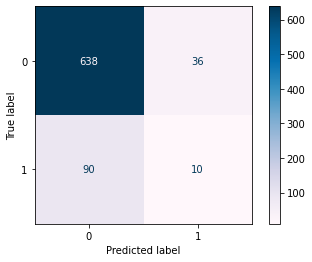

In [ ]:
# Plot Confusion Matrix for Binary Classes an array that depicts the True Positives, False Positives, False Negatives, and True negatives
plot_confusion_matrix(dtc, X_test, y_test, cmap = "PuBu")  
plt.grid(False)
plt.show()

In [ ]:
#Accuracy score for this model
dtc_precision = precision_score(dtc_pred, y_test)*100
print("precision score for Decision tree: " + str(dtc_precision) + "%")
dtc_accuracy = accuracy_score(dtc_pred, y_test)*100
print("Accuracy score for Decision tree: " + str(dtc_accuracy) + "%")

precision score for Decision tree: 10.0%
Accuracy score for Decision tree: 83.72093023255815%


### 3. kNN Algorithm

We need to find a suitable k for the kNN algorithm. This is done with the brute force method, to repeatedly train the model with different values of k, to find the minimum error. The number of iterations is limited to the square root of dataset size

In [ ]:
import math
train_data_size = len(train_data)
k = math.sqrt(train_data_size)
k

62.19324722186485

reference to choose k: https://www.quora.com/How-can-I-choose-the-best-K-in-KNN-K-nearest-neighbour-classification

In [ ]:
#First divide the entire data set into training set and test set. Apply the KNN algorithm into training set and cross validate it with test set.
#Lets assume you have a train set xtrain and test set xtest
#now create the model with k value 1 and predict with test set data and check the accuracy and other parameters then repeat the same process after increasing the k value by 1 each time.

from sklearn.neighbors import KNeighborsClassifier
min = 1
min_i = 1
for i in range(1,62):
    knn = KNeighborsClassifier(n_neighbors=i, metric = 'minkowski', p=2)
    knn.fit(X_train,y_train)
    knn_pred = knn.predict(X_test)
    result = np.mean(knn_pred != y_test)
    if (result < min):
        min = result
        min_i = i
        

In [ ]:
# Return k value that yields the minimum error 
print("k value that yields the minimum error: " + str(min_i)) 

k value that yields the minimum error: 22


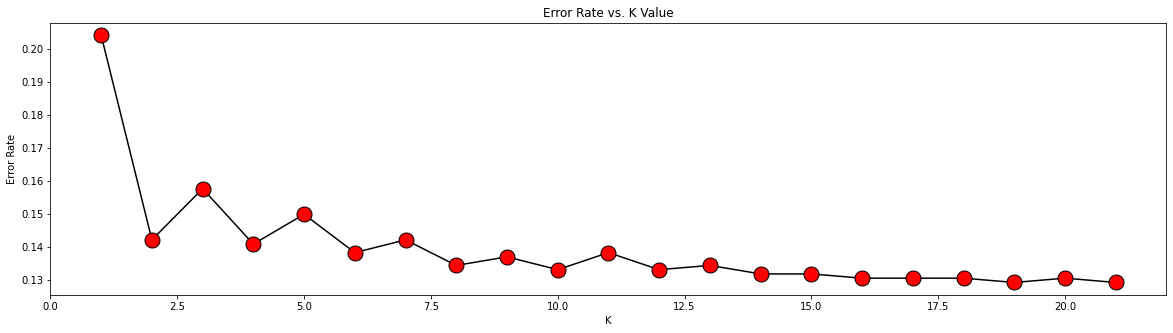

In [ ]:
#The same as above just add graph
from sklearn.neighbors import KNeighborsClassifier
error_rate = []
for i in range(1,min_i):
    knn = KNeighborsClassifier(n_neighbors=i, metric = 'minkowski', p=2)
    knn.fit(X_train,y_train)
    knn_pred = knn.predict(X_test)
    error_rate.append(np.mean(knn_pred != y_test))
plt.figure(figsize=(20,5))
plt.plot(range(1,min_i),error_rate,color='black', 
         marker='o',markerfacecolor='red', markersize=15)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()

In [ ]:
#train and score
knn = KNeighborsClassifier(n_neighbors = min_i, metric = 'minkowski', p=2)
knn.fit(X_train, y_train)
knn_pred=knn.predict(X_test)
knn_precision = precision_score(y_test,knn_pred)*100
print("precision score for KNN: " + str(knn_precision) + "%")
knn_accuracy = accuracy_score(y_test,knn_pred)*100
print("Accuracy score for KNN: " + str(knn_accuracy) + "%")

precision score for KNN: 100.0%
Accuracy score for KNN: 87.20930232558139%


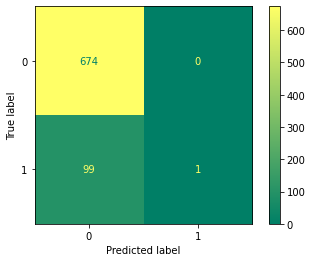

In [ ]:
#Confusion matrix
plot_confusion_matrix(knn, X_test, y_test, cmap = "summer")  
plt.grid(False)
plt.show()


### 4. Random Forest Classifier

In [ ]:
#Our  Random Forest Classifier model
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(bootstrap= True,
                           max_depth= 80,
                           max_features= 2,
                           min_samples_leaf= 3,
                           min_samples_split= 8,
                           n_estimators= 300,
                           random_state=0)
rfc.fit(X_train, y_train)
rfc_pred=rfc.predict(X_test)
rfc_precision = precision_score(y_test,rfc_pred)*100
print("precision score of Random Forest Classifier: " + str(rfc_precision) + "%")
rfc_accuracy = accuracy_score(y_test,rfc_pred)*100
print("Accuracy score of Random Forest Classifier: " + str(rfc_accuracy) + "%")

precision score of Random Forest Classifier: 100.0%
Accuracy score of Random Forest Classifier: 87.20930232558139%


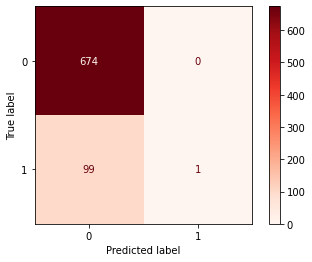

In [ ]:
# Results in Confusion matrix
plot_confusion_matrix(rfc, X_test, y_test, cmap = "Reds")  
plt.grid(False)
plt.show()

### 5. Support Vector Machine

In [ ]:
#Our Support Vector Machine
from sklearn.svm import SVC
svm = SVC(kernel='rbf', C=10)
svm.fit(X_train, y_train)
svm_pred= svm.predict(X_test)
svm_precision = precision_score(y_test,svm_pred)*100
print("precision score of Support Vector Machine: " + str(svm_precision) + "%")
svm_accuracy = accuracy_score(y_test,svm_pred)*100
print("Accuracy score of Support Vector Machine: " + str(svm_accuracy) + "%")

precision score of Support Vector Machine: 0.0%
Accuracy score of Support Vector Machine: 87.08010335917312%


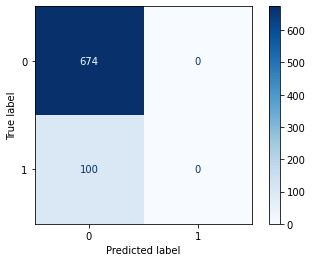

In [ ]:
#Results with  Confusion matrix
plot_confusion_matrix(svm, X_test, y_test, cmap = "Blues") 
plt.grid(False)
plt.show()

### 6. Extreme Gradient Boost Classifier

In [ ]:
#Our Extreme Gradient Boost Classifier from XGBClassifier
from xgboost import XGBClassifier
xgb = XGBClassifier(learning_rate=0.01, n_estimators=25, max_depth=15,gamma=0.6, subsample=0.52,colsample_bytree=0.6,seed=27, 
                    reg_lambda=2, booster='dart', colsample_bylevel=0.6, colsample_bynode=0.5)
xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)
xgb_accuracy = accuracy_score(y_test, xgb_pred)*100
xgb_precision = precision_score(y_test, xgb_pred)*100
#Accuracy scrore
print("Accuracy of Extreme Gradient Boost: " + str(xgb_accuracy) + "%")
#precision scrore
print("precision of Extreme Gradient Boost: " + str(xgb_precision) + "%")


Accuracy of Extreme Gradient Boost: 87.08010335917312%
precision of Extreme Gradient Boost: 0.0%


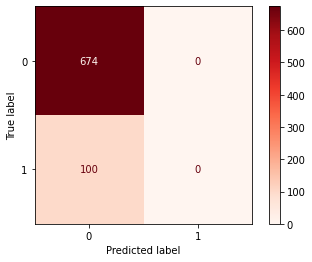

In [ ]:
#Results with  Confusion matrix
plot_confusion_matrix(xgb, X_test, y_test, cmap = "Reds")  
plt.grid(False)
plt.show()

### 7. Naive Bayes

In [ ]:
# One of the most famous algorithm Naive Bayes
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train,y_train)
nb_pred = nb.predict(X_test)
nb_accuracy = accuracy_score(y_test, nb_pred)*100
#accuracy score
print("Accuracy of Naive Bayes: " + str(nb_accuracy) + "%")
nb_precision = precision_score(y_test, nb_pred)*100
#precision score
print("precision of Naive Bayes: " + str(nb_precision) + "%")

Accuracy of Naive Bayes: 85.91731266149871%
precision of Naive Bayes: 38.46153846153847%


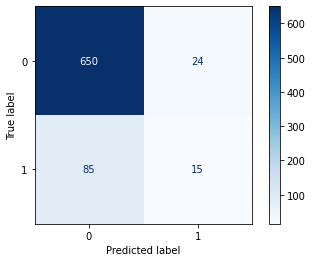

In [ ]:
#Results with  Confusion matrix
plot_confusion_matrix(nb, X_test, y_test, cmap = "Blues")  
plt.grid(False)
plt.show()

## Models Summary

In [ ]:
values = np.array([lr_accuracy, dtc_accuracy, rfc_accuracy, svm_accuracy, knn_accuracy, xgb_accuracy, nb_accuracy])
index = ["Logistic Regression", "Decision Tree", "Random Forest", "Support Vector Machine", "K Nearest Neighbor", "XG Boost", "Naive Bayes"]
# # providing an index and summary of the results
summary = pd.Series(values, index = index)
print(summary)


Logistic Regression       86.950904
Decision Tree             83.720930
Random Forest             87.209302
Support Vector Machine    87.080103
K Nearest Neighbor        87.209302
XG Boost                  87.080103
Naive Bayes               85.917313
dtype: float64


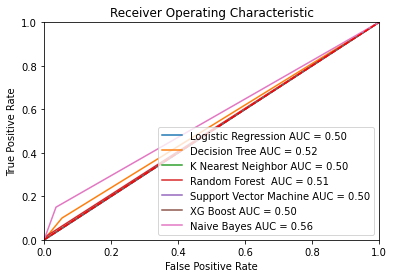

In [ ]:
#ROC and AUC
import sklearn.metrics as metrics

lr_fpr, lr_tpr, threshold = metrics.roc_curve(y_test, lr_pred)
lr_roc_auc = metrics.auc(lr_fpr, lr_tpr)

nb_fpr, nb_tpr, threshold = metrics.roc_curve(y_test, nb_pred)
nb_roc_auc = metrics.auc(nb_fpr, nb_tpr)

dtc_fpr, dtc_tpr, threshold = metrics.roc_curve(y_test, dtc_pred)
dtc_roc_auc = metrics.auc(dtc_fpr, dtc_tpr)

knn_fpr, knn_tpr, threshold = metrics.roc_curve(y_test, knn_pred)
knn_roc_auc = metrics.auc(knn_fpr, knn_tpr)

rfc_fpr, rfc_tpr, threshold = metrics.roc_curve(y_test, rfc_pred)
rfc_roc_auc = metrics.auc(rfc_fpr, rfc_tpr)

svm_fpr, svm_tpr, threshold = metrics.roc_curve(y_test, svm_pred)
svm_roc_auc = metrics.auc(svm_fpr, svm_tpr)

xgb_fpr, xgb_tpr, threshold = metrics.roc_curve(y_test, xgb_pred)
xgb_roc_auc = metrics.auc(xgb_fpr, xgb_tpr)

#plot it
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(lr_fpr, lr_tpr,  label = 'Logistic Regression AUC = %0.2f' % lr_roc_auc)
plt.plot(dtc_fpr, dtc_tpr,  label = 'Decision Tree AUC = %0.2f' % dtc_roc_auc)
plt.plot(knn_fpr, knn_tpr,  label = 'K Nearest Neighbor AUC = %0.2f' % knn_roc_auc)
plt.plot(rfc_fpr, rfc_tpr,  label = 'Random Forest  AUC = %0.2f' % rfc_roc_auc)
plt.plot(svm_fpr, svm_tpr,  label = 'Support Vector Machine AUC = %0.2f' % svm_roc_auc)
plt.plot(xgb_fpr, xgb_tpr,  label = 'XG Boost AUC = %0.2f' % xgb_roc_auc)
plt.plot(nb_fpr, nb_tpr,  label = 'Naive Bayes AUC = %0.2f' % nb_roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Models' Accuracy Improvement

### 1. Feature Selection

Attributes with highly unbalanced data are removed, as introducing such features into the machine learning model may introduce biasness. Looking at the data distribution, 'BPMeds', 'prevalentStroke', 'diabetes' are removed.

In [ ]:
#Drop some attributes
final_data = train_data.drop(['BPMeds', 'prevalentStroke', 'diabetes'], axis = 1)

In [ ]:
final_data # take another look

,male,age,education,currentSmoker,cigsPerDay,prevalentHyp,totChol,bloodPressure,BMI,heartRate,glucose
0,1,39,4.0,0,0.0,0,195.0,36.0,26.97,80.0,77.0
1,0,46,2.0,0,0.0,0,250.0,40.0,28.73,95.0,76.0
2,1,48,1.0,1,20.0,0,245.0,47.5,25.34,75.0,70.0
3,0,61,3.0,1,30.0,1,225.0,55.0,28.58,65.0,103.0
4,0,46,3.0,1,23.0,0,285.0,46.0,23.10,85.0,85.0
...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,1,313.0,87.0,25.97,66.0,86.0
4234,1,51,3.0,1,43.0,0,207.0,46.5,19.71,65.0,68.0
4235,0,48,2.0,1,20.0,0,248.0,59.0,22.00,84.0,86.0
4236,0,44,1.0,1,15.0,0,210.0,39.5,19.16,86.0,75.0


In [ ]:
#Select features according to the k highest scores.
from sklearn.feature_selection import SelectKBest, chi2
bestfeatures = SelectKBest(score_func=chi2, k=5)
fit = bestfeatures.fit(final_data, test_data)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(final_data.columns)
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Variable','Score'] 

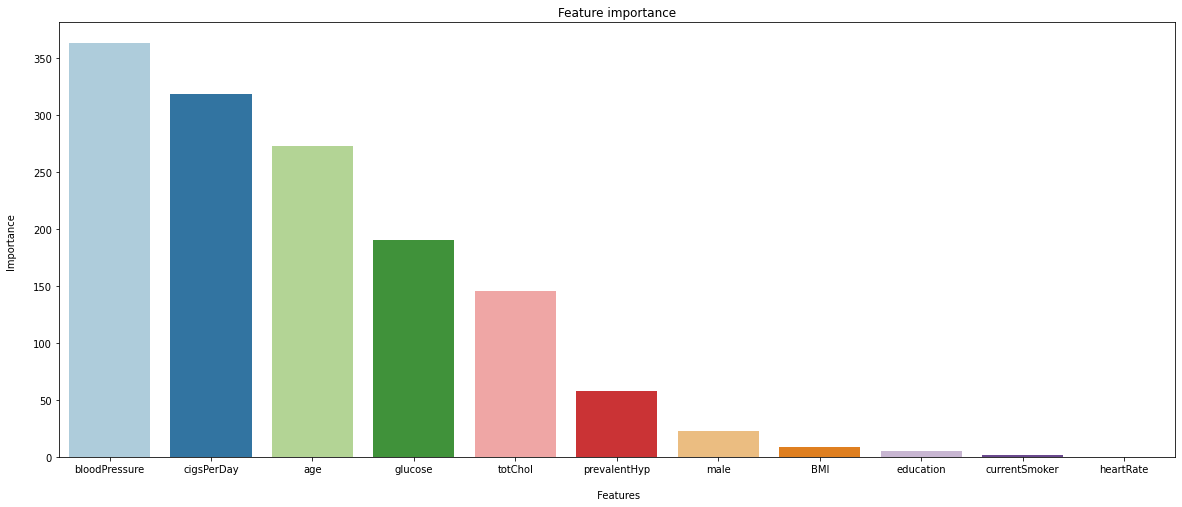

In [ ]:
#The bar chart of features decending according to the k highest scores.
fscores = featureScores.sort_values(by='Score', ascending = False)
plt.figure(figsize=(20,8))
sns.barplot(x='Variable', y='Score', data=fscores, palette ="Paired")
plt.title('Feature importance')
plt.xlabel('\n Features')
plt.ylabel('Importance \n')
plt.show()

as prevalentHyp, sysBP, and diaBP are highly correlated, keeping one feature out of 3 is enough. In this case, sysBP is chosen for it has the largest feature score.

In [ ]:
#Final data for retrain
features = ['cigsPerDay', 'bloodPressure', 'age', 'glucose', 'totChol', 'male', 'prevalentHyp']
final_data = train_data[features]

#### Re-train Model after Feature Selection

In [ ]:
# dataset splitting
X_train, X_test, y_train, y_test = train_test_split(final_data, test_data,test_size=0.2, random_state = 0)

In [ ]:
# logistic regression

lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_pred_1 = lr.predict(X_test)

lr_accuracy_1 = accuracy_score(lr_pred_1, y_test)*100
print(lr_accuracy_1)
# print("Accuracy for Logistic Regression Model: " + str(lr_accuracy) + "%")

# Decision tree
dtc = DecisionTreeClassifier(min_samples_split=40, random_state=0) 
dtc.fit(X_train, y_train)
dtc_pred_1 = dtc.predict(X_test)

dtc_accuracy_1 = accuracy_score(dtc_pred_1, y_test)*100
#K-Nearest Neighbor 
min = 1
min_i = 1
for i in range(1,62):
    knn = KNeighborsClassifier(n_neighbors=i, metric = 'minkowski', p=2)
    knn.fit(X_train,y_train)
    knn_pred = knn.predict(X_test)
    result = np.mean(knn_pred != y_test)
    if (result < min):
        min = result
        min_i = i
        
knn = KNeighborsClassifier(n_neighbors = min_i, metric = 'minkowski', p=2)
knn.fit(X_train, y_train)
knn_pred_1=knn.predict(X_test)
knn_accuracy_1 = accuracy_score(y_test,knn_pred_1)*100
#Random Forest Classifier
rfc=RandomForestClassifier(bootstrap= True,
                           max_depth= 80,
                           max_features= 2,
                           min_samples_leaf= 3,
                           min_samples_split= 8,
                           n_estimators= 300,
                           random_state=0)
rfc.fit(X_train, y_train)
rfc_pred_1=rfc.predict(X_test)
rfc_accuracy_1 = accuracy_score(y_test,rfc_pred_1)*100
# Support Vector 
svm = SVC(kernel='rbf', C=10)
svm.fit(X_train, y_train)
svm_pred_1= svm.predict(X_test)
svm_accuracy_1 = accuracy_score(y_test,svm_pred_1)*100

#XG Boost
xgb = XGBClassifier(learning_rate=0.01, n_estimators=25, max_depth=15,gamma=0.6, subsample=0.52,colsample_bytree=0.6,seed=27, 
                    reg_lambda=2, booster='dart', colsample_bylevel=0.6, colsample_bynode=0.5)
xgb.fit(X_train, y_train)
xgb_pred_1 = xgb.predict(X_test)
xgb_accuracy_1 = accuracy_score(y_test, xgb_pred_1)*100
#Gaussian Naive Bayes
nb = GaussianNB()
nb.fit(X_train,y_train)
nb_pred_1 = nb.predict(X_test)
nb_accuracy_1 = accuracy_score(y_test, nb_pred_1)*100

87.59689922480621


In [ ]:
values_1 = np.array([lr_accuracy_1, dtc_accuracy_1, rfc_accuracy_1, svm_accuracy_1, knn_accuracy_1, xgb_accuracy_1, nb_accuracy_1])
index = ["Logistic Regression", "Decision Tree", "Random Forest", "Support Vector Machine", "K Nearest Neighbor", "XG Boost", "Naive Bayes"]
# # providing an index
summary_1 = pd.Series(values_1, index = index)
print(summary_1)

Logistic Regression       87.596899
Decision Tree             85.271318
Random Forest             87.080103
Support Vector Machine    87.080103
K Nearest Neighbor        87.209302
XG Boost                  87.080103
Naive Bayes               85.658915
dtype: float64


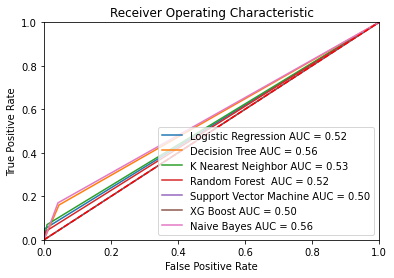

In [ ]:
#ROC and AUC
import sklearn.metrics as metrics

lr_fpr, lr_tpr, threshold = metrics.roc_curve(y_test, lr_pred_1)
lr_roc_auc = metrics.auc(lr_fpr, lr_tpr)

nb_fpr, nb_tpr, threshold = metrics.roc_curve(y_test, nb_pred_1)
nb_roc_auc = metrics.auc(nb_fpr, nb_tpr)

dtc_fpr, dtc_tpr, threshold = metrics.roc_curve(y_test, dtc_pred_1)
dtc_roc_auc = metrics.auc(dtc_fpr, dtc_tpr)

knn_fpr, knn_tpr, threshold = metrics.roc_curve(y_test, knn_pred_1)
knn_roc_auc = metrics.auc(knn_fpr, knn_tpr)

rfc_fpr, rfc_tpr, threshold = metrics.roc_curve(y_test, rfc_pred_1)
rfc_roc_auc = metrics.auc(rfc_fpr, rfc_tpr)

svm_fpr, svm_tpr, threshold = metrics.roc_curve(y_test, svm_pred_1)
svm_roc_auc = metrics.auc(svm_fpr, svm_tpr)

xgb_fpr, xgb_tpr, threshold = metrics.roc_curve(y_test, xgb_pred_1)
xgb_roc_auc = metrics.auc(xgb_fpr, xgb_tpr)

#plot it
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(lr_fpr, lr_tpr,  label = 'Logistic Regression AUC = %0.2f' % lr_roc_auc)
plt.plot(dtc_fpr, dtc_tpr,  label = 'Decision Tree AUC = %0.2f' % dtc_roc_auc)
plt.plot(knn_fpr, knn_tpr,  label = 'K Nearest Neighbor AUC = %0.2f' % knn_roc_auc)
plt.plot(rfc_fpr, rfc_tpr,  label = 'Random Forest  AUC = %0.2f' % rfc_roc_auc)
plt.plot(svm_fpr, svm_tpr,  label = 'Support Vector Machine AUC = %0.2f' % svm_roc_auc)
plt.plot(xgb_fpr, xgb_tpr,  label = 'XG Boost AUC = %0.2f' % xgb_roc_auc)
plt.plot(nb_fpr, nb_tpr,  label = 'Naive Bayes AUC = %0.2f' % nb_roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### 2. Feature Scaling

This step is done to standardize the values in the dataset, which are spreaded across different ranges. Upon the completion of this step, values in our dataset are scaled to values between 0 to 1. RobustScaler is utilized for this step, where the median is removed and data is scaled according the quantile range. This scaler is chosen as some of the outliers in the dataset are kept, and hence removing the mean and scale it according to unit variance (StandardScaler) may not be optimal

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(train_data, test_data,test_size=0.2, random_state = 0)
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
X_train=pd.DataFrame(scaler.fit_transform(X_train))
X_test=pd.DataFrame(scaler.transform(X_test))
X_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1.0,-0.285714,-0.5,-1.0,0.0,0.0,0.0,1.0,1.0,-0.472727,1.806452,0.537,1.428571,8.923077
1,0.0,0.000000,-0.5,-1.0,0.0,0.0,0.0,0.0,0.0,-0.745455,0.322581,-0.029,-0.785714,1.000000
2,0.0,-0.714286,0.0,0.0,1.5,0.0,0.0,0.0,0.0,0.381818,-0.451613,0.017,0.142857,0.846154
3,1.0,-0.857143,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-0.145455,0.129032,0.119,0.000000,-0.538462
4,1.0,-0.571429,1.0,-1.0,0.0,0.0,0.0,1.0,0.0,-0.381818,-0.096774,0.419,1.428571,3.076923


In [ ]:
# logistic regression

lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_pred_2 = lr.predict(X_test)

lr_accuracy_2 = accuracy_score(lr_pred_2, y_test)*100
print(lr_accuracy_2)
# print("Accuracy for Logistic Regression Model: " + str(lr_accuracy) + "%")

# decision tree
dtc = DecisionTreeClassifier(min_samples_split=40, random_state=0) 
dtc.fit(X_train, y_train)
dtc_pred_2 = dtc.predict(X_test)

dtc_accuracy_2 = accuracy_score(dtc_pred_2, y_test)*100
#K-Nearest Neighbor 
min = 1
min_i = 1
for i in range(1,62):
    knn = KNeighborsClassifier(n_neighbors=i, metric = 'minkowski', p=2)
    knn.fit(X_train,y_train)
    knn_pred = knn.predict(X_test)
    result = np.mean(knn_pred != y_test)
    if (result < min):
        min = result
        min_i = i
        
knn = KNeighborsClassifier(n_neighbors = min_i, metric = 'minkowski', p=2)
knn.fit(X_train, y_train)
knn_pred_2 = knn.predict(X_test)
knn_accuracy_2 = accuracy_score(y_test,knn_pred_2)*100
#Random Forest
rfc=RandomForestClassifier(bootstrap= True,
                           max_depth= 80,
                           max_features= 2,
                           min_samples_leaf= 3,
                           min_samples_split= 8,
                           n_estimators= 300,
                           random_state=0)
rfc.fit(X_train, y_train)
rfc_pred_2=rfc.predict(X_test)
rfc_accuracy_2 = accuracy_score(y_test,rfc_pred_2)*100
# Support Vector
svm = SVC(kernel='rbf', C=10)
svm.fit(X_train, y_train)
svm_pred_2= svm.predict(X_test)
svm_accuracy_2 = accuracy_score(y_test,svm_pred_2)*100
#XG Boost
xgb = XGBClassifier(learning_rate=0.01, n_estimators=25, max_depth=15,gamma=0.6, subsample=0.52,colsample_bytree=0.6,seed=27, 
                    reg_lambda=2, booster='dart', colsample_bylevel=0.6, colsample_bynode=0.5)
xgb.fit(X_train, y_train)
xgb_pred_2 = xgb.predict(X_test)
xgb_accuracy_2 = accuracy_score(y_test, xgb_pred_2)*100
#Naive Bayes
nb = GaussianNB()
nb.fit(X_train,y_train)
nb_pred_2 = nb.predict(X_test)
nb_accuracy_2 = accuracy_score(y_test, nb_pred_2)*100

87.85529715762273


In [ ]:
values_1 = np.array([lr_accuracy_2, dtc_accuracy_2, rfc_accuracy_2, svm_accuracy_2, knn_accuracy_2, xgb_accuracy_1, nb_accuracy_2])
index = ["Logistic Regression", "Decision Tree", "Random Forest", "Support Vector Machine", "K Nearest Neighbor", "XG Boost", "Naive Bayes"]
# providing an index of results
summary_1 = pd.Series(values_1, index = index)
print(summary_1)

Logistic Regression       87.855297
Decision Tree             83.720930
Random Forest             87.209302
Support Vector Machine    86.434109
K Nearest Neighbor        87.338501
XG Boost                  87.080103
Naive Bayes               85.917313
dtype: float64


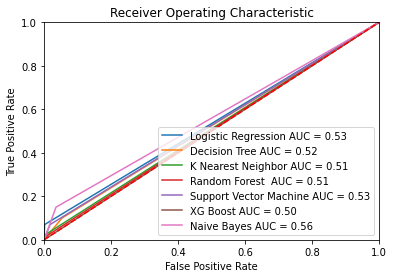

In [ ]:
#ROC and AUC
import sklearn.metrics as metrics

lr_fpr, lr_tpr, threshold = metrics.roc_curve(y_test, lr_pred_2)
lr_roc_auc = metrics.auc(lr_fpr, lr_tpr)

nb_fpr, nb_tpr, threshold = metrics.roc_curve(y_test, nb_pred_2)
nb_roc_auc = metrics.auc(nb_fpr, nb_tpr)

dtc_fpr, dtc_tpr, threshold = metrics.roc_curve(y_test, dtc_pred_2)
dtc_roc_auc = metrics.auc(dtc_fpr, dtc_tpr)

knn_fpr, knn_tpr, threshold = metrics.roc_curve(y_test, knn_pred_2)
knn_roc_auc = metrics.auc(knn_fpr, knn_tpr)

rfc_fpr, rfc_tpr, threshold = metrics.roc_curve(y_test, rfc_pred_2)
rfc_roc_auc = metrics.auc(rfc_fpr, rfc_tpr)

svm_fpr, svm_tpr, threshold = metrics.roc_curve(y_test, svm_pred_2)
svm_roc_auc = metrics.auc(svm_fpr, svm_tpr)

xgb_fpr, xgb_tpr, threshold = metrics.roc_curve(y_test, xgb_pred_2)
xgb_roc_auc = metrics.auc(xgb_fpr, xgb_tpr)

#plot it
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(lr_fpr, lr_tpr,  label = 'Logistic Regression AUC = %0.2f' % lr_roc_auc)
plt.plot(dtc_fpr, dtc_tpr,  label = 'Decision Tree AUC = %0.2f' % dtc_roc_auc)
plt.plot(knn_fpr, knn_tpr,  label = 'K Nearest Neighbor AUC = %0.2f' % knn_roc_auc)
plt.plot(rfc_fpr, rfc_tpr,  label = 'Random Forest  AUC = %0.2f' % rfc_roc_auc)
plt.plot(svm_fpr, svm_tpr,  label = 'Support Vector Machine AUC = %0.2f' % svm_roc_auc)
plt.plot(xgb_fpr, xgb_tpr,  label = 'XG Boost AUC = %0.2f' % xgb_roc_auc)
plt.plot(nb_fpr, nb_tpr,  label = 'Naive Bayes AUC = %0.2f' % nb_roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### 3. Stacked Classifier

In [ ]:
!pip install mlxtend==0.19.0

You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(final_data, test_data,test_size=0.2, random_state = 0)
from mlxtend.classifier import StackingCVClassifier
scv=StackingCVClassifier(classifiers=[xgb,knn,svm,lr,rfc],meta_classifier= lr,random_state=42)
scv.fit(X_train,y_train)
scv_pred = scv.predict(X_test)
scv_accuracy = accuracy_score(y_test, scv_pred)*100
print("Accuracy of SCV: " + str(scv_accuracy) + "%")

Accuracy of SCV: 87.46770025839793%


### 4. Cross Validation

In [ ]:
#Our Cross Validation
from sklearn.model_selection import ShuffleSplit
models = [lr, dtc, rfc, svm, knn, xgb, nb]
from sklearn.model_selection import StratifiedKFold
skf = ShuffleSplit(n_splits=10, test_size=0.2, random_state=42)
#model = KNeighborsClassifier(n_neighbors = 18, metric = 'minkowski', p=2)
result = pd.concat([final_data, test_data], axis=1)
values_2 = []
fpr_array = []
tpr_array = []




def training(model, train, test, fold_no):
    X_train = train.drop(['TenYearCHD'], axis = 1)
    y_train = train.TenYearCHD
    X_test = test.drop(['TenYearCHD'], axis = 1)
    y_test = test.TenYearCHD
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    fpr, tpr, threshold = metrics.roc_curve(y_test, pred)
    score = accuracy_score(y_test,pred)
    return score, fpr, tpr
#     print('For Fold {} the accuracy is {}'.format(str(fold_no),score))



for model in models:
    fold_no = 1
    max = 0
    fpr = []
    tpr = []
    for train_index,test_index in skf.split(final_data, test_data):
        train = result.iloc[train_index,:]
        test = result.iloc[test_index,:]
        score, fpr, tpr = training(model, train, test, fold_no)
        if score > max:
            max = score
            fpr = fpr
            tpr = tpr 
        fold_no += 1
    fpr_array.append(fpr)
    tpr_array.append(tpr)
    values_2.append(max*100)

Logistic Regression       88.372093
Decision Tree             87.209302
Random Forest             88.242894
Support Vector Machine    88.372093
K Nearest Neighbor        88.372093
XG Boost                  88.372093
Naive Bayes               85.658915
dtype: float64


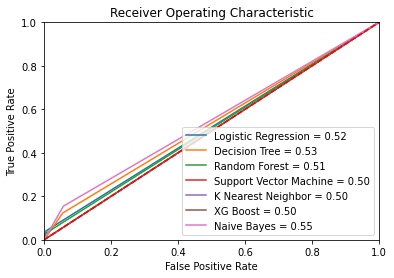

In [ ]:
#Provide an index 
index = ["Logistic Regression", "Decision Tree", "Random Forest", "Support Vector Machine", "K Nearest Neighbor", "XG Boost", "Naive Bayes"]
summary_1 = pd.Series(values_2, index = index)
print(summary_1)


plt.title('Receiver Operating Characteristic')
for i in range(0,7):  
    auc = metrics.auc(fpr_array[i], tpr_array[i])
    plt.plot(fpr_array[i], tpr_array[i],  label = index[i]+' = %0.2f' % auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=5be57678-e2e8-457b-83d7-6b5c45823df3' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>